## 1. Re-code the house price machine learning

In [16]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
data = load_boston()
X, y = data['data'], data['target']
X[1]
y[1]
len(X[:, 0])
len(y)
##
%matplotlib inline
def draw_rm_and_price():
	plt.scatter(X[:, 5], y)

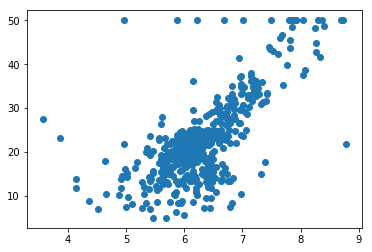

In [12]:
draw_rm_and_price()

In [17]:
## 定义一个函数计算random k和b时的房价 ##
import random
def price(rm, k, b):
	"""f(x) = k * x + b"""
	return k * rm + b

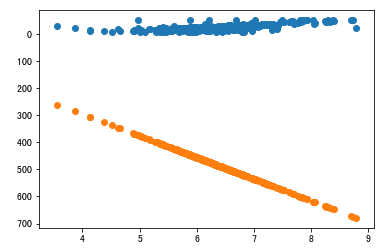

In [18]:
## 随机一次 ##
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
price_by_random_k_and_b
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)
## random k and b后得到的price ##
# list(y)

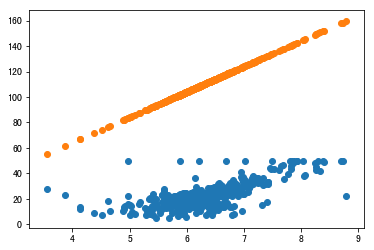

In [19]:
## 随机第二次 ##
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### (1). Different loss function

In [20]:
## loss ##
def loss(y, y_hat): # to evaluate the performance 
	return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))
## loss = 1/n(sum(|yi - hat(yi)|)) ##
def loss_new(y, y_hat):
	return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

### (2). Random Choose Method to get optimal k and b

In [21]:
## method 1: random generation: get best k and best b ##
X_rm = X[:, 5]
trying_times = 2000
min_loss = float('inf')
best_k, best_b = None, None
for i in range(trying_times):
	k = random.random() * 200 - 100
	b = random.random() * 200 - 100
	price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
	current_loss = loss_new(y, price_by_random_k_and_b)
	if current_loss < min_loss:
		min_loss = current_loss
		best_k, best_b = k, b
		print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: -61.029371976376765 best_b: 81.75478387377257, and the loss is: 324.32531221155807
When time is : 2, get best_k: -16.629351155237785 best_b: -64.84186083156948, and the loss is: 191.8840592652355
When time is : 3, get best_k: -14.123559126900659 best_b: -53.884056475941165, and the loss is: 165.17826816076783
When time is : 5, get best_k: -20.341510170534278 best_b: -4.991690596110757, and the loss is: 155.363451228627
When time is : 6, get best_k: -9.1273242825675 best_b: -5.025059017798455, and the loss is: 84.91976139264384
When time is : 10, get best_k: -2.215954891039715 best_b: -6.865571709263278, and the loss is: 43.32484434242247
When time is : 26, get best_k: -6.899299011580666 best_b: 87.0528272868402, and the loss is: 22.867298955709728
When time is : 200, get best_k: -6.660589675420226 best_b: 55.242280910099964, and the loss is: 11.242475399467756
When time is : 258, get best_k: 1.4465396207688883 best_b: 19.61268975465717, and the loss is: 9.

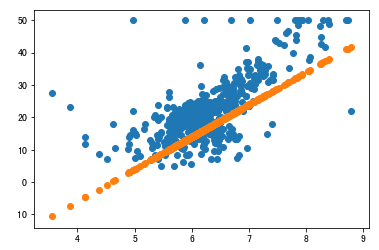

In [22]:
X_rm = X[:, 5]
k = 10
b = -46
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### (3). Supervised Direction to get optimal k and b

In [23]:
trying_times = 2000
min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100
##
direction = [
	(+1, -1),  # first element: k's change direction, second element: b's change direction
	(+1, +1), 
	(-1, -1), 
	(-1, +1),
]
next_direction = random.choice(direction)
scalar = 0.2
for i in range(trying_times):
	k_direction, b_direction = next_direction
	current_k, current_b = best_k + k_direction * scalar, best_b + b_direction *scalar
	price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]
	current_loss = loss_new(y, price_by_random_k_and_b)
	if current_loss < min_loss:
		min_loss = current_loss
		best_k, best_b = current_k, current_b
		next_direction = next_direction
		print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
	else:
		next_direction = random.choice(direction)

When time is : 0, get best_k: 17.915413729536464 best_b: -32.41431295627508, and the loss is: 57.644705907893304
When time is : 3, get best_k: 17.715413729536465 best_b: -32.614312956275086, and the loss is: 56.18777903042291
When time is : 4, get best_k: 17.515413729536466 best_b: -32.81431295627509, and the loss is: 54.73085215295258
When time is : 5, get best_k: 17.315413729536466 best_b: -33.01431295627509, and the loss is: 53.27392527548228
When time is : 6, get best_k: 17.115413729536467 best_b: -33.214312956275094, and the loss is: 51.8169983980119
When time is : 7, get best_k: 16.915413729536468 best_b: -33.4143129562751, and the loss is: 50.362753436214966
When time is : 8, get best_k: 16.71541372953647 best_b: -33.6143129562751, and the loss is: 48.91156136791653
When time is : 9, get best_k: 16.51541372953647 best_b: -33.8143129562751, and the loss is: 47.462959391631934
When time is : 10, get best_k: 16.31541372953647 best_b: -34.014312956275106, and the loss is: 46.0143574

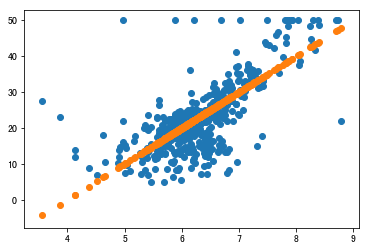

In [24]:
k = 10
b = -40
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### （4）Gradient Descent to get optimal k and b

### 损失函数

### $$loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$$

### 对k求偏导

### $$\frac{\partial loss}{\partial k} = - \frac{2}{n}\sum{{x_i(y_i - \hat{y_i})}}$$

### 对b求偏导数

### $$\frac{\partial loss}{\partial b} = - \frac{2}{n}\sum{{(y_i - \hat{y_i})}}$$

In [25]:
def partial_k(x, y, y_hat):
	n = len(y)
	gradient = 0
	for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
		gradient += (y_i - y_hat_i) * x_i
	return -2 / n * (gradient)

def partial_b(x, y, y_hat):
	n = len(y)
	gradient = 0
	for y_i, y_hat_i in zip(list(y), list(y_hat)):
		gradient += (y_i - y_hat_i)
	return -2 / n * (gradient)

In [57]:
trying_times = 2000
X, y = data['data'], data['target']
min_loss = float('inf')
current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100
learning_rate = 0.001
updata_time = 0

for i in range(trying_times):
	price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]
	current_loss = loss_new(y, price_by_random_k_and_b)
	if current_loss < min_loss:
		min_loss = current_loss
		if i % 50:
			print('When time is {}, get best_k: {} best_b: {}, and the loss is {}'.format(i, current_k, current_b, min_loss))
	k_gradient = partial_k(X_rm, y, price_by_random_k_and_b)
	b_gradient = partial_b(X_rm, y, price_by_random_k_and_b)
	current_k = current_k + (-1 * k_gradient) * learning_rate # k与偏导方向相反
	current_b = current_b + (-1 * b_gradient) * learning_rate # b与偏导方向相反

When time is 1, get best_k: 89.32551711426494 best_b: -22.882940883120582, and the loss is 515.9624693170576
When time is 2, get best_k: 82.76119478094151 best_b: -23.9148658217547, and the loss is 473.6761785127583
When time is 3, get best_k: 76.73484862264412 best_b: -24.862218178780214, and the loss is 434.8554438592118
When time is 4, get best_k: 71.20238901608448 best_b: -25.731929066498637, and the loss is 399.21624708147425
When time is 5, get best_k: 66.12333968550195 best_b: -26.530361560661586, and the loss is 366.4978465092759
When time is 6, get best_k: 61.4605415722051 best_b: -27.263357253680137, and the loss is 336.46086945215274
When time is 7, get best_k: 57.17988097336724 best_b: -27.93627899258444, and the loss is 308.88556091321044
When time is 8, get best_k: 53.25003996109858 best_b: -28.554050114410863, and the loss is 283.5701758288551
When time is 9, get best_k: 49.64226725582409 best_b: -29.121190466068573, and the loss is 260.32950307187997
When time is 10, ge

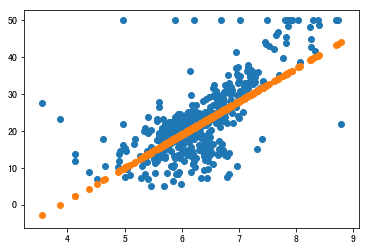

In [58]:
X_rm = X[:, 5]
k = 9
b = -35
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## Answer following questions

## Search Policy 之 重复课堂代码

### （1）使用正则表达式匹配出来城市名和经纬度，并且存储在字典里

In [10]:
## 使用正则表达式匹配出来城市名和经纬度，并且存储在字典里 ##
import re
import math
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""
city_location = {
	'香港': (114.17, 22.28)
}
##
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")
for line in coordination_source.split('\n'):
	city_info = pattern.findall(line)
	if not city_info: continue
	# following: we find the city info
	city, long, lat = city_info[0]
	long, lat = float(long), float(lat)
	city_location[city] = (long, lat)
##
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

### （2）求地图上两点之间的距离

In [11]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d
##
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])
get_geo_distance('上海', '杭州')

153.5185697155768

### （3）绘制每个城市及其坐标

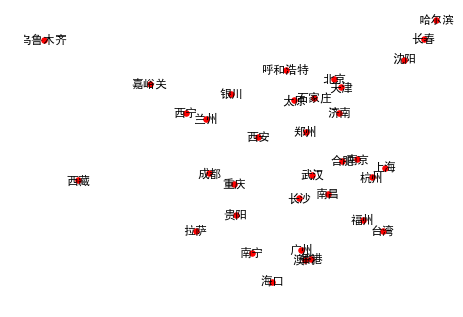

In [12]:
## 绘制每个城市及其坐标 ##
import networkx as nx
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

### （4）少数城市的路线规划

In [274]:
from collections import defaultdict
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}
simple_connection_info = defaultdict(list)
simple_connection_info.update(simple_connection_info_src)
print(simple_connection_info['西安'])

['兰州', '长沙']


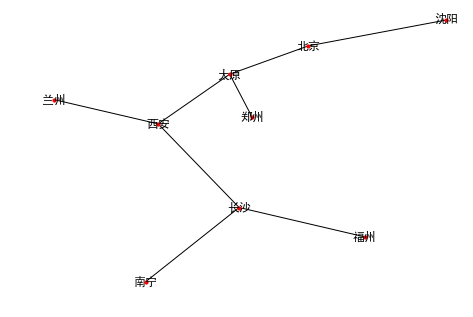

In [19]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

### （5）通过广度优先遍历进行路线规划

In [242]:
def search(start, destination, connection_grpah, sort_candidate):
	pathes = [[start]]
	
	visitied = set()
	
	while pathes: # if we find existing pathes
		path = pathes.pop(0) ## 把列表的第0个元素拿出来
		froninter = path[-1]
		
		if froninter in visitied: continue
			
		successors = connection_grpah[froninter]
		
		for city in successors:
			if city in path: continue  # eliminate loop
				
			new_path = path + [city]
			
			pathes.append(new_path)
			
			if city == destination: return new_path
		
		visitied.add(froninter)
		
		pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

## 三种排序函数，所谓上面search函数的最后一个传入参数
def transfer_stations_first(pathes): 
	return sorted(pathes, key=len)

def transfer_as_much_possible(pathes):
	return sorted(pathes, key=len, reverse=True)

def shortest_path_first(pathes):   
	if len(pathes) <= 1: return pathes
	
	def get_path_distnace(path):
		distance = 0
		for station in path[:-1]:
			distance += get_geo_distance(station, path[-1])
		return distance
	return sorted(pathes, key=get_path_distnace)


In [16]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)
def pretty_print(cities):
	print('🚗->'.join(cities))
pretty_print(search('北京', '福州', simple_connection_info, sort_candidate=shortest_path_first))

北京🚗->太原🚗->西安🚗->长沙🚗->福州


### （6）更多城市的路线规划

In [41]:
## 距离不超过300公里的城市之间建立联系
threshold = 300 ## 卡了距离最多不超过300公里
city_connection = defaultdict(list)
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)
city_connection

defaultdict(list,
            {'香港': ['广州', '长沙', '澳门', '广州', '长沙', '澳门'],
             '广州': ['香港', '香港', '长沙', '澳门', '长沙', '澳门'],
             '长沙': ['香港',
              '武汉',
              '郑州',
              '广州',
              '香港',
              '武汉',
              '郑州',
              '广州',
              '澳门',
              '澳门'],
             '澳门': ['香港', '广州', '长沙', '香港', '广州', '长沙'],
             '兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '西宁': ['兰州', '兰州', '成都', '拉萨', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '兰州', '西宁', '拉萨', '重庆', '拉萨', '重庆'],
             '银川': ['兰州', '重庆', '兰州', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '重庆': ['成都', '贵阳', '成都', '贵阳', '银川', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京', '郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '石家庄', '武汉', '长沙', '太原', '长沙', '太原'],
             '济南': ['石家庄', '石家庄', '合肥', '北京', '天津', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '石家庄', '郑州', '呼和浩特', '呼和浩特'],

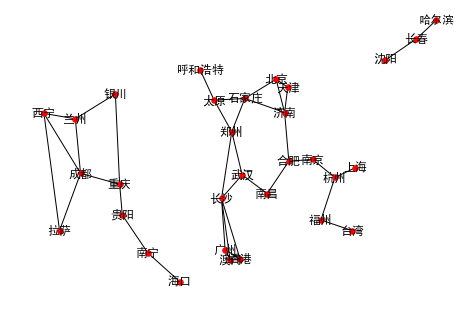

In [22]:
city_with_road = nx.Graph(city_connection)
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [23]:
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_stations_first))
pretty_print(search('北京', '广州', city_connection, sort_candidate=transfer_as_much_possible))

北京🚗->石家庄🚗->郑州🚗->长沙🚗->广州
北京🚗->石家庄🚗->郑州🚗->武汉🚗->长沙🚗->广州


### （7）可以实现深度优先遍历和广度优先遍历的函数

In [46]:
## 从某个起点开始，在输入的graph中，进行深度优先遍历或者广度优先遍历，输出来遍历元素
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    seen = set()
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            # visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

def dfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    seen = set()
    while visited:
        froninter = visited.pop() #
        
        if froninter in seen: continue
        
        for successor in graph[froninter]:
            if successor in seen: continue
            print(successor)
            
            visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            # visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [34]:
number_grpah = defaultdict(list)
number_grpah.update({
	1: [2, 3],
	2: [1, 4], 
	3: [1, 5],
	4: [2, 6], 
	5: [3, 7],
	7: [5, 8]
})

In [48]:
dfs(number_grpah, 1)

2
3
5
7
8
4
6


{1, 2, 3, 4, 5, 6, 7, 8}

In [35]:
bfs(number_grpah, 1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

## Search policy 之 地铁线路规划

### (1) 重复课堂上的爬虫

In [9]:
import requests
import re
url = 'https://movie.douban.com/subject/26931786/?from=showing'
response = requests.get(url)
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '
pattern = re.compile(what_we_want)
likes = pattern.findall(response.text)
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page
movie.douban.com/subject/3168101/?from=subject-page


### （2）获取上海地铁的站点信息（方法1）

In [202]:
url = "http://map.amap.com/subway/index.html?&1100"
headers = {'user-agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
responses = requests.get(url=url, headers=headers)
data = responses.text
data = data.encode('ISO-8859-1')
data = data.decode('utf-8')
soup = BeautifulSoup(data, 'lxml')
# 获取城市信息
res1 = soup.find_all(class_="city-list fl")[0]
res2 = soup.find_all(class_="more-city-list")[0]
print("---", res1)
print("---", res2)

--- <div class="city-list fl">
<a cityname="beijing" class="city select" href="javascript:void(0)" id="1100">北京</a>
<a cityname="shanghai" class="city" href="javascript:void(0)" id="3100">上海</a>
<a cityname="guangzhou" class="city" href="javascript:void(0)" id="4401">广州</a>
<a cityname="shenzhen" class="city" href="javascript:void(0)" id="4403">深圳</a>
<a cityname="wuhan" class="city" href="javascript:void(0)" id="4201">武汉</a>
<a cityname="tianjin" class="city" href="javascript:void(0)" id="1200">天津</a>
<a cityname="nanjing" class="city" href="javascript:void(0)" id="3201">南京</a>
<a cityname="xianggang" class="city last" href="javascript:void(0)" id="8100">香港</a>
</div>
--- <div class="more-city-list" style="display: none">
<a cityname="chongqing" class="other-city" href="javascript:void(0)" id="5000">重庆</a>
<a cityname="hangzhou" class="other-city" href="javascript:void(0)" id="3301">杭州</a>
<a cityname="shenyang" class="other-city" href="javascript:void(0)" id="2101">沈阳</a>
<a cityname

#### a. 获取所有城市的所有地铁站点 

In [299]:
## 定义一个可以通过解析网页获取站点信息的函数 ##
def parse_get_subway(ID, city, name):
	# 拼接地铁信息的url
	url = 'http://map.amap.com/service/subway?_1555502190153&srhdata=' + ID + '_drw_' + city + '.json'
	# 获取数据
	response = requests.get(url=url, headers=headers)
	# 传递一个参数接收返回的字符串类型
	html = response.text
	# 通过json.loads将json字符串类型转为python数据类型
	result = json.loads(html)
	# 循环遍历数据节点，所有地铁路线
	for node in result['l']:
		# "st"为地铁线的站点
		for start in node['st']:
			# 判断是否含有地铁分线
			# node:"l"里包含所有地铁路线  “la”为分线
			if len(node['la']) > 0:
				# "ln"为1号线，2号线。。。  “n”为地铁站站名
				print(name, node['ln'] + '(' + node['la'] + ')', start['n'], start['sl'])

				with open('subway.json', 'a+', encoding='utf8') as f:
					f.write(name + ',' + node['ln'] + '(' + node['la'] + ')' + ',' + start['n'] + ',' + start['sl'] + '\n')
			else:
				print(name, node['ln'], start['n'], start['sl'])

				with open('subway.json', 'a+', encoding='utf8') as f:
					f.write(name + ',' + node['ln'] + ',' + start['n'] + ',' + start['sl'] + '\n')

## 获取所有一线城市和二线城市的站点信息 ##
## 存储在当前文件夹下的subway.json文件中 ##
# 遍历a标签
import json
for temp in res1.find_all('a'):
	# 城市ID值
	ID = temp['id']
	# 城市拼音名
	city_name = temp['cityname']
	if city_name == "shanghai":
		# 城市名
		name = temp.get_text()
		print(ID, city_name, name)
		parse_get_subway(ID, city_name, name)
# 其他城市
for temp in res2.find_all('a'):
	# 城市ID值
	ID = temp['id']
	# 城市拼音名
	city_name = temp['cityname']
	# 城市名
	name = temp.get_text()
	parse_get_subway(ID, city_name, name)


3100 shanghai 上海
上海 1号线 莘庄 121.385373,31.111152
上海 1号线 外环路 121.393020,31.120899
上海 1号线 莲花路 121.402910,31.130900
上海 1号线 锦江乐园 121.414107,31.142217
上海 1号线 上海南站 121.430041,31.154579
上海 1号线 漕宝路 121.433143,31.168344
上海 1号线 上海体育馆 121.437423,31.182813
上海 1号线 徐家汇 121.436837,31.195338
上海 1号线 衡山路 121.446424,31.204528
上海 1号线 常熟路 121.449141,31.213524
上海 1号线 陕西南路 121.458744,31.215150
上海 1号线 黄陂南路 121.473306,31.222745
上海 1号线 人民广场 121.475137,31.232781
上海 1号线 新闸路 121.468151,31.238373
上海 1号线 汉中路 121.458699,31.241883
上海 1号线 上海火车站 121.457939,31.249632
上海 1号线 中山北路 121.459204,31.258891
上海 1号线 延长路 121.455329,31.271675
上海 1号线 上海马戏城 121.452023,31.279895
上海 1号线 汶水路 121.450251,31.292556
上海 1号线 彭浦新村 121.448642,31.306604
上海 1号线 共康路 121.447063,31.318936
上海 1号线 通河新村 121.441546,31.331130
上海 1号线 呼兰路 121.437711,31.339703
上海 1号线 共富新村 121.434063,31.355082
上海 1号线 宝安公路 121.430914,31.369555
上海 1号线 友谊西路 121.427953,31.381296
上海 1号线 富锦路 121.424661,31.392260
上海 2号线(广兰路-徐泾东) 广兰路 121.621072,31.211050
上海 2号线(广兰路-徐泾东) 金科路 121.601989

上海 11号线(花桥-迪士尼) 秀沿路 121.598390,31.138128
上海 11号线(花桥-迪士尼) 罗山路 121.593152,31.153259
上海 11号线(花桥-迪士尼) 御桥 121.570914,31.158131
上海 11号线(花桥-迪士尼) 浦三路 121.539005,31.150861
上海 11号线(花桥-迪士尼) 三林东 121.522999,31.146459
上海 11号线(花桥-迪士尼) 三林 121.511594,31.143172
上海 11号线(花桥-迪士尼) 东方体育中心 121.480304,31.153366
上海 11号线(花桥-迪士尼) 龙耀路 121.459702,31.159720
上海 11号线(花桥-迪士尼) 云锦路 121.458519,31.166488
上海 11号线(花桥-迪士尼) 龙华 121.452958,31.172672
上海 11号线(花桥-迪士尼) 上海游泳馆 121.441424,31.179123
上海 11号线(花桥-迪士尼) 徐家汇 121.436837,31.195338
上海 11号线(花桥-迪士尼) 交通大学 121.435253,31.202213
上海 11号线(花桥-迪士尼) 江苏路 121.430642,31.220411
上海 11号线(花桥-迪士尼) 隆德路 121.423576,31.230509
上海 11号线(花桥-迪士尼) 曹杨路 121.417701,31.239302
上海 11号线(花桥-迪士尼) 枫桥路 121.411402,31.241850
上海 11号线(花桥-迪士尼) 真如 121.407219,31.250767
上海 11号线(花桥-迪士尼) 上海西站 121.400926,31.262693
上海 11号线(花桥-迪士尼) 李子园 121.389969,31.269020
上海 11号线(花桥-迪士尼) 祁连山路 121.376035,31.271650
上海 11号线(花桥-迪士尼) 武威路 121.364678,31.276646
上海 11号线(花桥-迪士尼) 桃浦新村 121.349623,31.281603
上海 11号线(花桥-迪士尼) 南翔 121.323141,31.296952
上海 11号线(花桥-迪

杭州 1号线(下沙江滨-湘湖) 湘湖 120.234391,30.167585
杭州 1号线(下沙江滨-湘湖) 滨康路 120.231003,30.183864
杭州 1号线(下沙江滨-湘湖) 西兴 120.220429,30.187295
杭州 1号线(下沙江滨-湘湖) 滨和路 120.217552,30.199550
杭州 1号线(下沙江滨-湘湖) 江陵路 120.216602,30.208994
杭州 1号线(下沙江滨-湘湖) 近江 120.197851,30.230791
杭州 1号线(下沙江滨-湘湖) 婺江路 120.191008,30.236914
杭州 1号线(下沙江滨-湘湖) 城站 120.181104,30.244457
杭州 1号线(下沙江滨-湘湖) 定安路 120.167751,30.245954
杭州 1号线(下沙江滨-湘湖) 龙翔桥 120.164052,30.254642
杭州 1号线(下沙江滨-湘湖) 凤起路 120.162887,30.263779
杭州 1号线(下沙江滨-湘湖) 武林广场 120.164324,30.272368
杭州 1号线(下沙江滨-湘湖) 西湖文化广场 120.165639,30.279585
杭州 1号线(下沙江滨-湘湖) 打铁关 120.176592,30.285421
杭州 1号线(下沙江滨-湘湖) 闸弄口 120.192496,30.284507
杭州 1号线(下沙江滨-湘湖) 火车东站 120.212892,30.291124
杭州 1号线(下沙江滨-湘湖) 彭埠 120.223661,30.294065
杭州 1号线(下沙江滨-湘湖) 七堡 120.241065,30.300002
杭州 1号线(下沙江滨-湘湖) 九和路 120.252784,30.305799
杭州 1号线(下沙江滨-湘湖) 九堡 120.266622,30.307910
杭州 1号线(下沙江滨-湘湖) 客运中心 120.278700,30.311183
杭州 1号线(下沙江滨-湘湖) 下沙西 120.312534,30.309918
杭州 1号线(下沙江滨-湘湖) 金沙湖 120.325720,30.309246
杭州 1号线(下沙江滨-湘湖) 高沙路 120.335408,30.309420
杭州 1号线(下沙江滨-湘湖) 文

成都 1号线(五根松-韦家碾) 五根松 104.081369,30.502041
成都 1号线(五根松-韦家碾) 广都 104.075713,30.510752
成都 1号线(五根松-韦家碾) 四河 104.070125,30.516133
成都 1号线(五根松-韦家碾) 华府大道 104.069836,30.525746
成都 1号线(五根松-韦家碾) 天府五街 104.069510,30.537107
成都 1号线(五根松-韦家碾) 天府三街 104.069204,30.546203
成都 1号线(五根松-韦家碾) 世纪城 104.068930,30.554870
成都 1号线(五根松-韦家碾) 锦城广场 104.066528,30.567722
成都 1号线(五根松-韦家碾) 孵化园 104.064313,30.575873
成都 1号线(五根松-韦家碾) 金融城 104.064147,30.582579
成都 1号线(五根松-韦家碾) 高新 104.063847,30.594368
成都 1号线(五根松-韦家碾) 火车南站 104.067393,30.605459
成都 1号线(五根松-韦家碾) 桐梓林 104.067115,30.615310
成都 1号线(五根松-韦家碾) 倪家桥 104.066885,30.624773
成都 1号线(五根松-韦家碾) 省体育馆 104.066606,30.633361
成都 1号线(五根松-韦家碾) 华西坝 104.066279,30.642821
成都 1号线(五根松-韦家碾) 锦江宾馆 104.066053,30.650046
成都 1号线(五根松-韦家碾) 天府广场 104.065751,30.657453
成都 1号线(五根松-韦家碾) 骡马市 104.065617,30.666514
成都 1号线(五根松-韦家碾) 文殊院 104.068036,30.672535
成都 1号线(五根松-韦家碾) 人民北路 104.073056,30.684833
成都 1号线(五根松-韦家碾) 火车北站 104.074056,30.695517
成都 1号线(五根松-韦家碾) 升仙湖 104.083474,30.704625
成都 1号线(五根松-韦家碾) 韦家碾 104.086860,30.717644
成都 1号线(科学

苏州 1号线 木渎 120.518128,31.274974
苏州 1号线 金枫路 120.529572,31.276492
苏州 1号线 汾湖路 120.541830,31.278047
苏州 1号线 玉山路 120.549468,31.283409
苏州 1号线 苏州乐园 120.548763,31.293930
苏州 1号线 塔园路 120.556692,31.299963
苏州 1号线 滨河路 120.566119,31.300779
苏州 1号线 西环路 120.577161,31.301539
苏州 1号线 桐泾北路 120.591203,31.302984
苏州 1号线 广济南路 120.601066,31.304529
苏州 1号线 养育巷 120.614052,31.305140
苏州 1号线 乐桥 120.622529,31.305505
苏州 1号线 临顿路 120.630633,31.307982
苏州 1号线 相门 120.638847,31.309803
苏州 1号线 东环路 120.649874,31.312254
苏州 1号线 中央公园 120.659938,31.313768
苏州 1号线 星海广场 120.670812,31.315499
苏州 1号线 东方之门 120.679758,31.317017
苏州 1号线 文化博览中心 120.704346,31.323217
苏州 1号线 时代广场 120.713181,31.322437
苏州 1号线 星湖街 120.720431,31.323183
苏州 1号线 南施街 120.733132,31.324493
苏州 1号线 星塘街 120.744297,31.325644
苏州 1号线 钟南街 120.756226,31.326506
苏州 2号线 骑河 120.655,31.4377
苏州 2号线 富翔路 120.651,31.4299
苏州 2号线 高铁苏州北站 120.645,31.4218
苏州 2号线 大湾 120.633,31.4165
苏州 2号线 富元路 120.625,31.4035
苏州 2号线 蠡口 120.624,31.3881
苏州 2号线 徐图港 120.626,31.3756
苏州 2号线 阳澄湖中路 120.627,31.3668
苏州 2号线 

郑州 1号线 河南工业大学 113.542174,34.826597
郑州 1号线 郑大科技园 113.541865,34.816735
郑州 1号线 郑州大学 113.541443,34.807581
郑州 1号线 梧桐街 113.540929,34.794393
郑州 1号线 兰寨 113.541000,34.783442
郑州 1号线 铁炉 113.540795,34.768091
郑州 1号线 市民中心 113.553932,34.762054
郑州 1号线 西流湖 113.570188,34.761135
郑州 1号线 西三环 113.588175,34.760193
郑州 1号线 秦岭路 113.603314,34.756800
郑州 1号线 五一公园 113.614308,34.755827
郑州 1号线 碧沙岗 113.624373,34.755040
郑州 1号线 绿城广场 113.633548,34.747475
郑州 1号线 医学院 113.642608,34.747529
郑州 1号线 郑州火车站 113.656168,34.746627
郑州 1号线 二七广场 113.665854,34.752527
郑州 1号线 人民路 113.673865,34.757566
郑州 1号线 紫荆山 113.682064,34.762176
郑州 1号线 燕庄 113.703396,34.763390
郑州 1号线 民航路 113.715814,34.763954
郑州 1号线 会展中心 113.725738,34.766727
郑州 1号线 黄河南路 113.744513,34.762860
郑州 1号线 农业南路 113.755327,34.765423
郑州 1号线 东风南路 113.767132,34.764450
郑州 1号线 郑州东站 113.777099,34.759251
郑州 1号线 博学路 113.792535,34.759935
郑州 1号线 市体育中心 113.810399,34.773100
郑州 1号线 龙子湖 113.810497,34.792726
郑州 1号线 文苑北路 113.812199,34.808447
郑州 2号线 刘庄 113.678979,34.843779
郑州 2号线 柳林 113.681284,34.

青岛 2号线 李村公园 120.425954,36.167794
青岛 2号线 李村 120.424747,36.159067
青岛 2号线 枣山路 120.433459,36.153862
青岛 2号线 华楼山路 120.439516,36.149334
青岛 2号线 东韩 120.441927,36.128291
青岛 2号线 辽阳东路 120.450073,36.117388
青岛 2号线 同安路 120.455361,36.111315
青岛 2号线 苗岭路 120.464784,36.100457
青岛 2号线 石老人浴场 120.464463,36.093228
青岛 2号线 海安路 120.450859,36.085683
青岛 2号线 海川路 120.443405,36.076445
青岛 2号线 海游路 120.434638,36.071724
青岛 2号线 麦岛 120.423198,36.066093
青岛 2号线 高雄路 120.410706,36.066133
青岛 2号线 燕儿岛路 120.401596,36.064963
青岛 2号线 浮山所 120.390666,36.065735
青岛 2号线 五四广场 120.380343,36.064750
青岛 2号线 芝泉路 120.368590,36.069496
青岛 3号线 青岛北站 120.376820,36.169780
青岛 3号线 永平路 120.393108,36.172198
青岛 3号线 振华路 120.405921,36.169204
青岛 3号线 君峰路 120.414861,36.164622
青岛 3号线 李村 120.424747,36.159067
青岛 3号线 万年泉路 120.427719,36.148603
青岛 3号线 海尔路 120.423254,36.137012
青岛 3号线 地铁大厦 120.414349,36.130884
青岛 3号线 长沙路 120.403261,36.120809
青岛 3号线 双山 120.397150,36.114367
青岛 3号线 清江路 120.387296,36.106869
青岛 3号线 错埠岭 120.385385,36.095977
青岛 3号线 敦化路 120.385361,36.089054
青岛 

合肥 1号线 九联圩 117.286181,31.691457
合肥 1号线 丙子铺 117.297393,31.691450
合肥 1号线 万年埠 117.302102,31.698436
合肥 1号线 万达城 117.302177,31.705865
合肥 1号线 云谷路 117.302353,31.713224
合肥 1号线 金斗公园 117.302630,31.723036
合肥 1号线 塘西河公园 117.302601,31.731507
合肥 1号线 紫庐 117.302627,31.740745
合肥 1号线 滨湖会展中心 117.302666,31.754639
合肥 1号线 高王 117.291420,31.773139
合肥 1号线 骆岗 117.291451,31.783406
合肥 1号线 南站南广场 117.291500,31.792643
合肥 1号线 合肥南站 117.292104,31.799187
合肥 1号线 望湖城 117.292040,31.805361
合肥 1号线 葛大店 117.303172,31.814564
合肥 1号线 秋浦河路 117.301989,31.823177
合肥 1号线 朱岗 117.301739,31.832155
合肥 1号线 合工大南区 117.300710,31.847196
合肥 1号线 包公园 117.301360,31.856274
合肥 1号线 大东门 117.300761,31.863957
合肥 1号线 明光路 117.304588,31.869977
合肥 1号线 长淮 117.309132,31.875623
合肥 1号线 合肥火车站 117.315587,31.883376
合肥 2号线 南岗 117.115653,31.850724
合肥 2号线 桂庄 117.126784,31.850724
合肥 2号线 汽车西站 117.136078,31.850853
合肥 2号线 振兴路 117.151850,31.851072
合肥 2号线 蜀山西 117.168011,31.851358
合肥 2号线 大蜀山 117.186676,31.852178
合肥 2号线 天柱路 117.198511,31.854188
合肥 2号线 科学大道 117.208841,31.855940

#### b. 只获得上海的站点信息

In [204]:
## 只是获得上海的地铁站点信息，文件中包括城市，几号线，站名以及经纬度 ##
ID = "3100"
city = "shanghai"
name = "上海"
url = 'http://map.amap.com/service/subway?_1555502190153&srhdata=' + ID + '_drw_' + city + '.json'
# 获取数据
response = requests.get(url=url, headers=headers)
# 传递一个参数接收返回的字符串类型
html = response.text
# 通过json.loads将json字符串类型转为python数据类型
result = json.loads(html)
# 循环遍历数据节点，所有地铁路线
for node in result['l']:
	# "st"为地铁线的站点
	for start in node['st']:

		# 判断是否含有地铁分线
		# node:"l"里包含所有地铁路线  “la”为分线
		if len(node['la']) > 0:
			# "ln"为1号线，2号线。。。  “n”为地铁站站名
			print(name, node['ln'] + '(' + node['la'] + ')', start['n'], start['sl'])

			with open('shanghai_subway.json', 'a+', encoding='utf8') as f:
				f.write(name + ',' + node['ln'] + '(' + node['la'] + ')' + ',' + start['n'] + ',' + start['sl'] + '\n')
		else:
			print(name, node['ln'], start['n'], start['sl'])

			with open('shanghai_subway.json', 'a+', encoding='utf8') as f:
				f.write(name + ',' + node['ln'] + ',' + start['n'] + ',' + start['sl'] + '\n')

3100 shanghai 上海
上海 1号线 莘庄 121.385373,31.111152
上海 1号线 外环路 121.393020,31.120899
上海 1号线 莲花路 121.402910,31.130900
上海 1号线 锦江乐园 121.414107,31.142217
上海 1号线 上海南站 121.430041,31.154579
上海 1号线 漕宝路 121.433143,31.168344
上海 1号线 上海体育馆 121.437423,31.182813
上海 1号线 徐家汇 121.436837,31.195338
上海 1号线 衡山路 121.446424,31.204528
上海 1号线 常熟路 121.449141,31.213524
上海 1号线 陕西南路 121.458744,31.215150
上海 1号线 黄陂南路 121.473306,31.222745
上海 1号线 人民广场 121.475137,31.232781
上海 1号线 新闸路 121.468151,31.238373
上海 1号线 汉中路 121.458699,31.241883
上海 1号线 上海火车站 121.457939,31.249632
上海 1号线 中山北路 121.459204,31.258891
上海 1号线 延长路 121.455329,31.271675
上海 1号线 上海马戏城 121.452023,31.279895
上海 1号线 汶水路 121.450251,31.292556
上海 1号线 彭浦新村 121.448642,31.306604
上海 1号线 共康路 121.447063,31.318936
上海 1号线 通河新村 121.441546,31.331130
上海 1号线 呼兰路 121.437711,31.339703
上海 1号线 共富新村 121.434063,31.355082
上海 1号线 宝安公路 121.430914,31.369555
上海 1号线 友谊西路 121.427953,31.381296
上海 1号线 富锦路 121.424661,31.392260
上海 2号线(广兰路-徐泾东) 广兰路 121.621072,31.211050
上海 2号线(广兰路-徐泾东) 金科路 121.601989

上海 12号线 七莘路 121.362464,31.131638
上海 12号线 虹莘路 121.380348,31.137448
上海 12号线 顾戴路 121.391856,31.140890
上海 12号线 东兰路 121.391915,31.155823
上海 12号线 虹梅路 121.397250,31.160350
上海 12号线 虹漕路 121.410553,31.164033
上海 12号线 桂林公园 121.419654,31.166986
上海 12号线 漕宝路 121.433143,31.168344
上海 12号线 龙漕路 121.444383,31.169458
上海 12号线 龙华 121.452958,31.172672
上海 12号线 龙华中路 121.457054,31.183843
上海 12号线 大木桥路 121.463278,31.194057
上海 12号线 嘉善路 121.460704,31.202820
上海 12号线 陕西南路 121.458744,31.215150
上海 12号线 南京西路 121.459971,31.229853
上海 12号线 汉中路 121.458699,31.241883
上海 12号线 曲阜路 121.471543,31.242307
上海 12号线 天潼路 121.482473,31.243829
上海 12号线 国际客运中心 121.498158,31.250160
上海 12号线 提篮桥 121.506801,31.253518
上海 12号线 大连路 121.513088,31.257938
上海 12号线 江浦公园 121.523697,31.264570
上海 12号线 宁国路 121.532352,31.268574
上海 12号线 隆昌路 121.544692,31.275213
上海 12号线 爱国路 121.552655,31.279788
上海 12号线 复兴岛 121.561315,31.280779
上海 12号线 东陆路 121.579124,31.282533
上海 12号线 巨峰路 121.588365,31.280684
上海 12号线 杨高北路 121.602960,31.280092
上海 12号线 金京路 121.615477,31.279823
上

上海 11号线(嘉定北-迪士尼) 康新公路 121.617199,31.130439
上海 11号线(嘉定北-迪士尼) 迪士尼 121.667959,31.141263
上海 11号线(花桥-迪士尼) 迪士尼 121.667959,31.141263
上海 11号线(花桥-迪士尼) 康新公路 121.617199,31.130439
上海 11号线(花桥-迪士尼) 秀沿路 121.598390,31.138128
上海 11号线(花桥-迪士尼) 罗山路 121.593152,31.153259
上海 11号线(花桥-迪士尼) 御桥 121.570914,31.158131
上海 11号线(花桥-迪士尼) 浦三路 121.539005,31.150861
上海 11号线(花桥-迪士尼) 三林东 121.522999,31.146459
上海 11号线(花桥-迪士尼) 三林 121.511594,31.143172
上海 11号线(花桥-迪士尼) 东方体育中心 121.480304,31.153366
上海 11号线(花桥-迪士尼) 龙耀路 121.459702,31.159720
上海 11号线(花桥-迪士尼) 云锦路 121.458519,31.166488
上海 11号线(花桥-迪士尼) 龙华 121.452958,31.172672
上海 11号线(花桥-迪士尼) 上海游泳馆 121.441424,31.179123
上海 11号线(花桥-迪士尼) 徐家汇 121.436837,31.195338
上海 11号线(花桥-迪士尼) 交通大学 121.435253,31.202213
上海 11号线(花桥-迪士尼) 江苏路 121.430642,31.220411
上海 11号线(花桥-迪士尼) 隆德路 121.423576,31.230509
上海 11号线(花桥-迪士尼) 曹杨路 121.417701,31.239302
上海 11号线(花桥-迪士尼) 枫桥路 121.411402,31.241850
上海 11号线(花桥-迪士尼) 真如 121.407219,31.250767
上海 11号线(花桥-迪士尼) 上海西站 121.400926,31.262693
上海 11号线(花桥-迪士尼) 李子园 121.389969,31.269020
上海 11号线(花

In [205]:
# ID = "3100"
# city = "shanghai"
# name = "上海"
# url = 'http://map.amap.com/service/subway?_1555502190153&srhdata=' + ID + '_drw_' + city + '.json'
# # 获取数据
# response = requests.get(url=url, headers=headers)
# # 传递一个参数接收返回的字符串类型
# html = response.text
# # 通过json.loads将json字符串类型转为python数据类型
# result = json.loads(html)
# node = result['l'][1]
# print("---", len(node))
# print("---", node['st'])
# print("---", node['st'][0]['n'])
# print("---", node['la'])
# print("---", node['ln'])
# print("---", node['st'][0]['sl'])

### （3）获取上海地铁的站点信息（方法2，待完善）

In [49]:
url = 'http://sh.bendibao.com/ditie/'
response = requests.get(url)
response.text


'\r\n\r\n\r\n\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=7" />    \r\n<title>上海地铁_上海地铁查询_最新上海地铁线路图_上海地铁运营时间_上海地铁规划图-上海本地宝</title>\r\n<meta content="上海地铁,上海地铁查询,最新上海地铁线路图,上海地铁运营时间,上海地铁规划图" name="Keywords" />\r\n<meta content="上海本地宝交通频道为你带来最新上海地铁线路图，上海地铁运营时间，上海地铁规划图的详细信息" name="Description" />\r\n<meta name="renderer" content="webkit">\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/cssreset.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/metro.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/linecolor.min.css" />\r\n<link rel="stylesheet" href="http://jtapi.bendibao.com/ditie/css/top.css" />\r\n\r\n<meta http-equiv="mobile-agent" content="format=x

### （4）上海地铁站点及其位置图谱

#### 上海地铁站点

In [183]:
## 上海地铁站点，以及其经纬度信息，获得shanghai_location这个字典中包含地铁站名和其经纬度 shanghai_location ##
# coding=utf-8
# import os
# print(os.getcwd())
# ##
file = "/Users/cailingling/Documents/NOTE/shanghai_subway.json"
target_city = "上海"
shanghai_location =  {}
with open(file) as f:
	for line in f.readlines():
		if line.strip().split(",")[0] == target_city:
			if line.strip().split(",")[2] not in shanghai_location:
				shanghai_location[line.strip().split(",")[2]] = [float(line.strip().split(",")[3]), float(line.strip().split(",")[4])]
print(shanghai_location)

{'莘庄': [121.385373, 31.111152], '外环路': [121.39302, 31.120899], '莲花路': [121.40291, 31.1309], '锦江乐园': [121.414107, 31.142217], '上海南站': [121.430041, 31.154579], '漕宝路': [121.433143, 31.168344], '上海体育馆': [121.437423, 31.182813], '徐家汇': [121.436837, 31.195338], '衡山路': [121.446424, 31.204528], '常熟路': [121.449141, 31.213524], '陕西南路': [121.458744, 31.21515], '黄陂南路': [121.473306, 31.222745], '人民广场': [121.475137, 31.232781], '新闸路': [121.468151, 31.238373], '汉中路': [121.458699, 31.241883], '上海火车站': [121.457939, 31.249632], '中山北路': [121.459204, 31.258891], '延长路': [121.455329, 31.271675], '上海马戏城': [121.452023, 31.279895], '汶水路': [121.450251, 31.292556], '彭浦新村': [121.448642, 31.306604], '共康路': [121.447063, 31.318936], '通河新村': [121.441546, 31.33113], '呼兰路': [121.437711, 31.339703], '共富新村': [121.434063, 31.355082], '宝安公路': [121.430914, 31.369555], '友谊西路': [121.427953, 31.381296], '富锦路': [121.424661, 31.39226], '广兰路': [121.621072, 31.21105], '金科路': [121.601989, 31.204213], '张江高科': [121.587687, 31.201832]

#### 上海地铁线路的位置图谱 

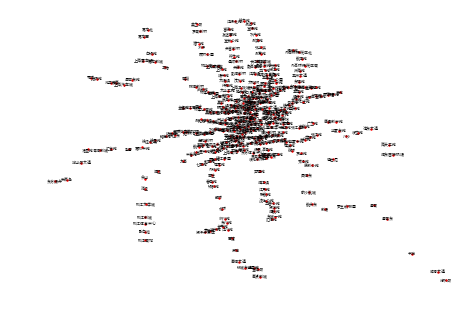

In [200]:
## 绘制地铁站点图 ##
import networkx as nx
city_graph = nx.Graph()
city_graph.add_nodes_from(list(shanghai_location.keys()))
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(city_graph, shanghai_location, with_labels=True, node_size=2, font_size  = 4)

### （5）获取上海地铁站点之间联系

#### 获得上海地铁每一条线路上的所有站点

In [259]:
## 获得上海地铁每一条线路上的所有站点 shanghai ##
# coding=utf-8
# import os
# print(os.getcwd())
# ##
file = "/Users/cailingling/Documents/NOTE/shanghai_subway.json"
target_city = "上海"
shanghai =  {}
with open(file) as f:
	for line in f.readlines():
		if line.strip().split(",")[0] == target_city:
			line_num = line.strip().split(",")[1]
			station = line.strip().split(",")[2]
			if line.strip().split(",")[1] not in shanghai:
				shanghai[line_num] = [station]
			else:
				if station not in shanghai[line_num]:
					shanghai[line_num].append(station)
print(shanghai["8号线"])

['沈杜公路', '联航路', '江月路', '浦江镇', '芦恒路', '凌兆新村', '东方体育中心', '杨思', '成山路', '耀华路', '中华艺术宫', '西藏南路', '陆家浜路', '老西门', '大世界', '人民广场', '曲阜路', '中兴路', '西藏北路', '虹口足球场', '曲阳路', '四平路', '鞍山新村', '江浦路', '黄兴路', '延吉中路', '黄兴公园', '翔殷路', '嫩江路', '市光路']


#### 构建上海地铁站点之间的联系图

In [269]:
## 构建上海地铁站点之间的联系图，存储在字典中，station_connection ##

## 获得上海地铁所有的站点
all_station = sum(shanghai.values(), [])
## 将所有站点的列表去重复
all_station_uniq = list(set(all_station))
## 上海地铁所有的线
all_line = shanghai.keys()
## station_connection为所有站点之间的联系图
station_connection = {}
for station in all_station_uniq:
    for line in all_line:
        if station in shanghai[line]:
            index = shanghai[line].index(station)
            if station not in station_connection:
                if index == 0:
                    station_connection[station] = [shanghai[line][index + 1]]
                elif index == len(shanghai[line]) - 1:
                    station_connection[station] = [shanghai[line][index - 1]]
                else:
                    station_connection[station] = [shanghai[line][index - 1], shanghai[line][index + 1]]          
            else:    
                if index == 0:
                    station_connection[station].append(shanghai[line][index + 1])
                elif index == len(shanghai[line]) - 1:
                    station_connection[station].append(shanghai[line][index - 1])
                else:
                    station_connection[station].append(shanghai[line][index - 1])
                    station_connection[station].append(shanghai[line][index + 1])
# print(station_connection)            
print(station_connection["南京东路"])
print(station_connection["市光路"])
station_connection   

['陆家嘴', '人民广场', '天潼路', '豫园', '天潼路', '豫园']
['嫩江路']


defaultdict(list,
            {'潘广路': ['刘行', '罗南新村'],
             '天潼路': ['四川北路', '南京东路', '四川北路', '南京东路', '曲阜路', '国际客运中心'],
             '商城路': ['世纪大道', '小南门'],
             '鞍山新村': ['四平路', '江浦路'],
             '博兴路': ['金桥路', '五莲路'],
             '巨峰路': ['五莲路', '东靖路', '东陆路', '杨高北路'],
             '浦电路(4号线)': ['世纪大道', '蓝村路'],
             '上海体育场': ['东安路', '上海体育馆'],
             '提篮桥': ['国际客运中心', '大连路'],
             '金运路': ['金沙江西路'],
             '娄山关路': ['中山公园', '威宁路'],
             '水产路': ['宝杨路', '淞滨路'],
             '塘桥': ['蓝村路', '南浦大桥'],
             '港城路': ['外高桥保税区北'],
             '鹤沙航城': ['周浦东', '航头东'],
             '龙耀路': ['云锦路', '东方体育中心', '东方体育中心', '云锦路'],
             '四平路': ['曲阳路', '鞍山新村', '同济大学', '邮电新村', '同济大学', '邮电新村'],
             '杨思': ['东方体育中心', '成山路'],
             '芳华路': ['龙阳路', '锦绣路'],
             '杨高南路': ['锦绣路', '高科西路'],
             '北桥': ['颛桥', '剑川路'],
             '莲花路': ['外环路', '锦江乐园'],
             '云锦路': ['龙华', '龙耀路', '龙耀路', '龙华'],
             '张江高科': ['金科路

#### 绘制上海地铁站点之间的联系图

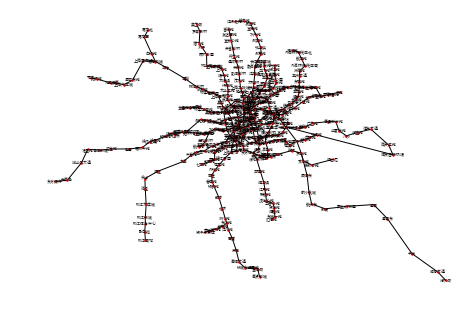

In [285]:
## 绘制上海地铁站点之间的联系图 ##
station_connection_ = defaultdict(list)
station_connection_.update(station_connection)
nx.draw(nx.Graph(station_connection_), shanghai_location, with_labels=True, node_size=2, font_size  = 4)

### （6）上海地铁线路搜索实例

In [288]:
## 搜索实例 ##
pretty_print(search('四平路', '南京东路', station_connection, sort_candidate=transfer_stations_first))

四平路🚗->邮电新村🚗->海伦路🚗->四川北路🚗->天潼路🚗->南京东路


In [289]:
pretty_print(search('江浦路', '南京东路', station_connection, sort_candidate=transfer_stations_first))

江浦路🚗->鞍山新村🚗->四平路🚗->邮电新村🚗->海伦路🚗->四川北路🚗->天潼路🚗->南京东路


In [290]:
pretty_print(search('东方体育中心', '沈杜公路', station_connection, sort_candidate=transfer_stations_first))

东方体育中心🚗->凌兆新村🚗->芦恒路🚗->浦江镇🚗->江月路🚗->联航路🚗->沈杜公路


In [291]:
pretty_print(search('四平路', '沈杜公路', station_connection, sort_candidate=transfer_as_much_possible))

四平路🚗->曲阳路🚗->虹口足球场🚗->东宝兴路🚗->宝山路🚗->上海火车站🚗->汉中路🚗->新闸路🚗->人民广场🚗->黄陂南路🚗->陕西南路🚗->常熟路🚗->衡山路🚗->徐家汇🚗->上海体育馆🚗->漕宝路🚗->上海南站🚗->石龙路🚗->龙漕路🚗->漕溪路🚗->宜山路🚗->虹桥路🚗->延安西路🚗->中山公园🚗->江苏路🚗->静安寺🚗->南京西路🚗->淮海中路🚗->新天地🚗->老西门🚗->陆家浜路🚗->西藏南路🚗->南浦大桥🚗->塘桥🚗->蓝村路🚗->浦电路(4号线)🚗->世纪大道🚗->上海科技馆🚗->世纪公园🚗->龙阳路🚗->芳华路🚗->锦绣路🚗->杨高南路🚗->高科西路🚗->东明路🚗->高青路🚗->华夏西路🚗->上南路🚗->灵岩南路🚗->东方体育中心🚗->凌兆新村🚗->芦恒路🚗->浦江镇🚗->江月路🚗->联航路🚗->沈杜公路


In [297]:
def get_geo_distance(station1, station2):
    return geo_distance(shanghai_location[station1], shanghai_location[station2])
pretty_print(search('江浦路', '沈杜公路', station_connection, sort_candidate=shortest_path_first))

江浦路🚗->鞍山新村🚗->四平路🚗->邮电新村🚗->海伦路🚗->四川北路🚗->天潼路🚗->南京东路🚗->豫园🚗->老西门🚗->陆家浜路🚗->西藏南路🚗->中华艺术宫🚗->耀华路🚗->成山路🚗->杨思🚗->东方体育中心🚗->凌兆新村🚗->芦恒路🚗->浦江镇🚗->江月路🚗->联航路🚗->沈杜公路
